In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde


data = pd.read_csv("customer marketing_campaign.csv", sep='\t', engine='python')




features = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
            'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
            'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'Complain']


response = 'Response'


data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [9]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.shape

(2240, 29)

In [13]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


 # Gráfica de distribucion para cada variable con respecto a la Respuesta

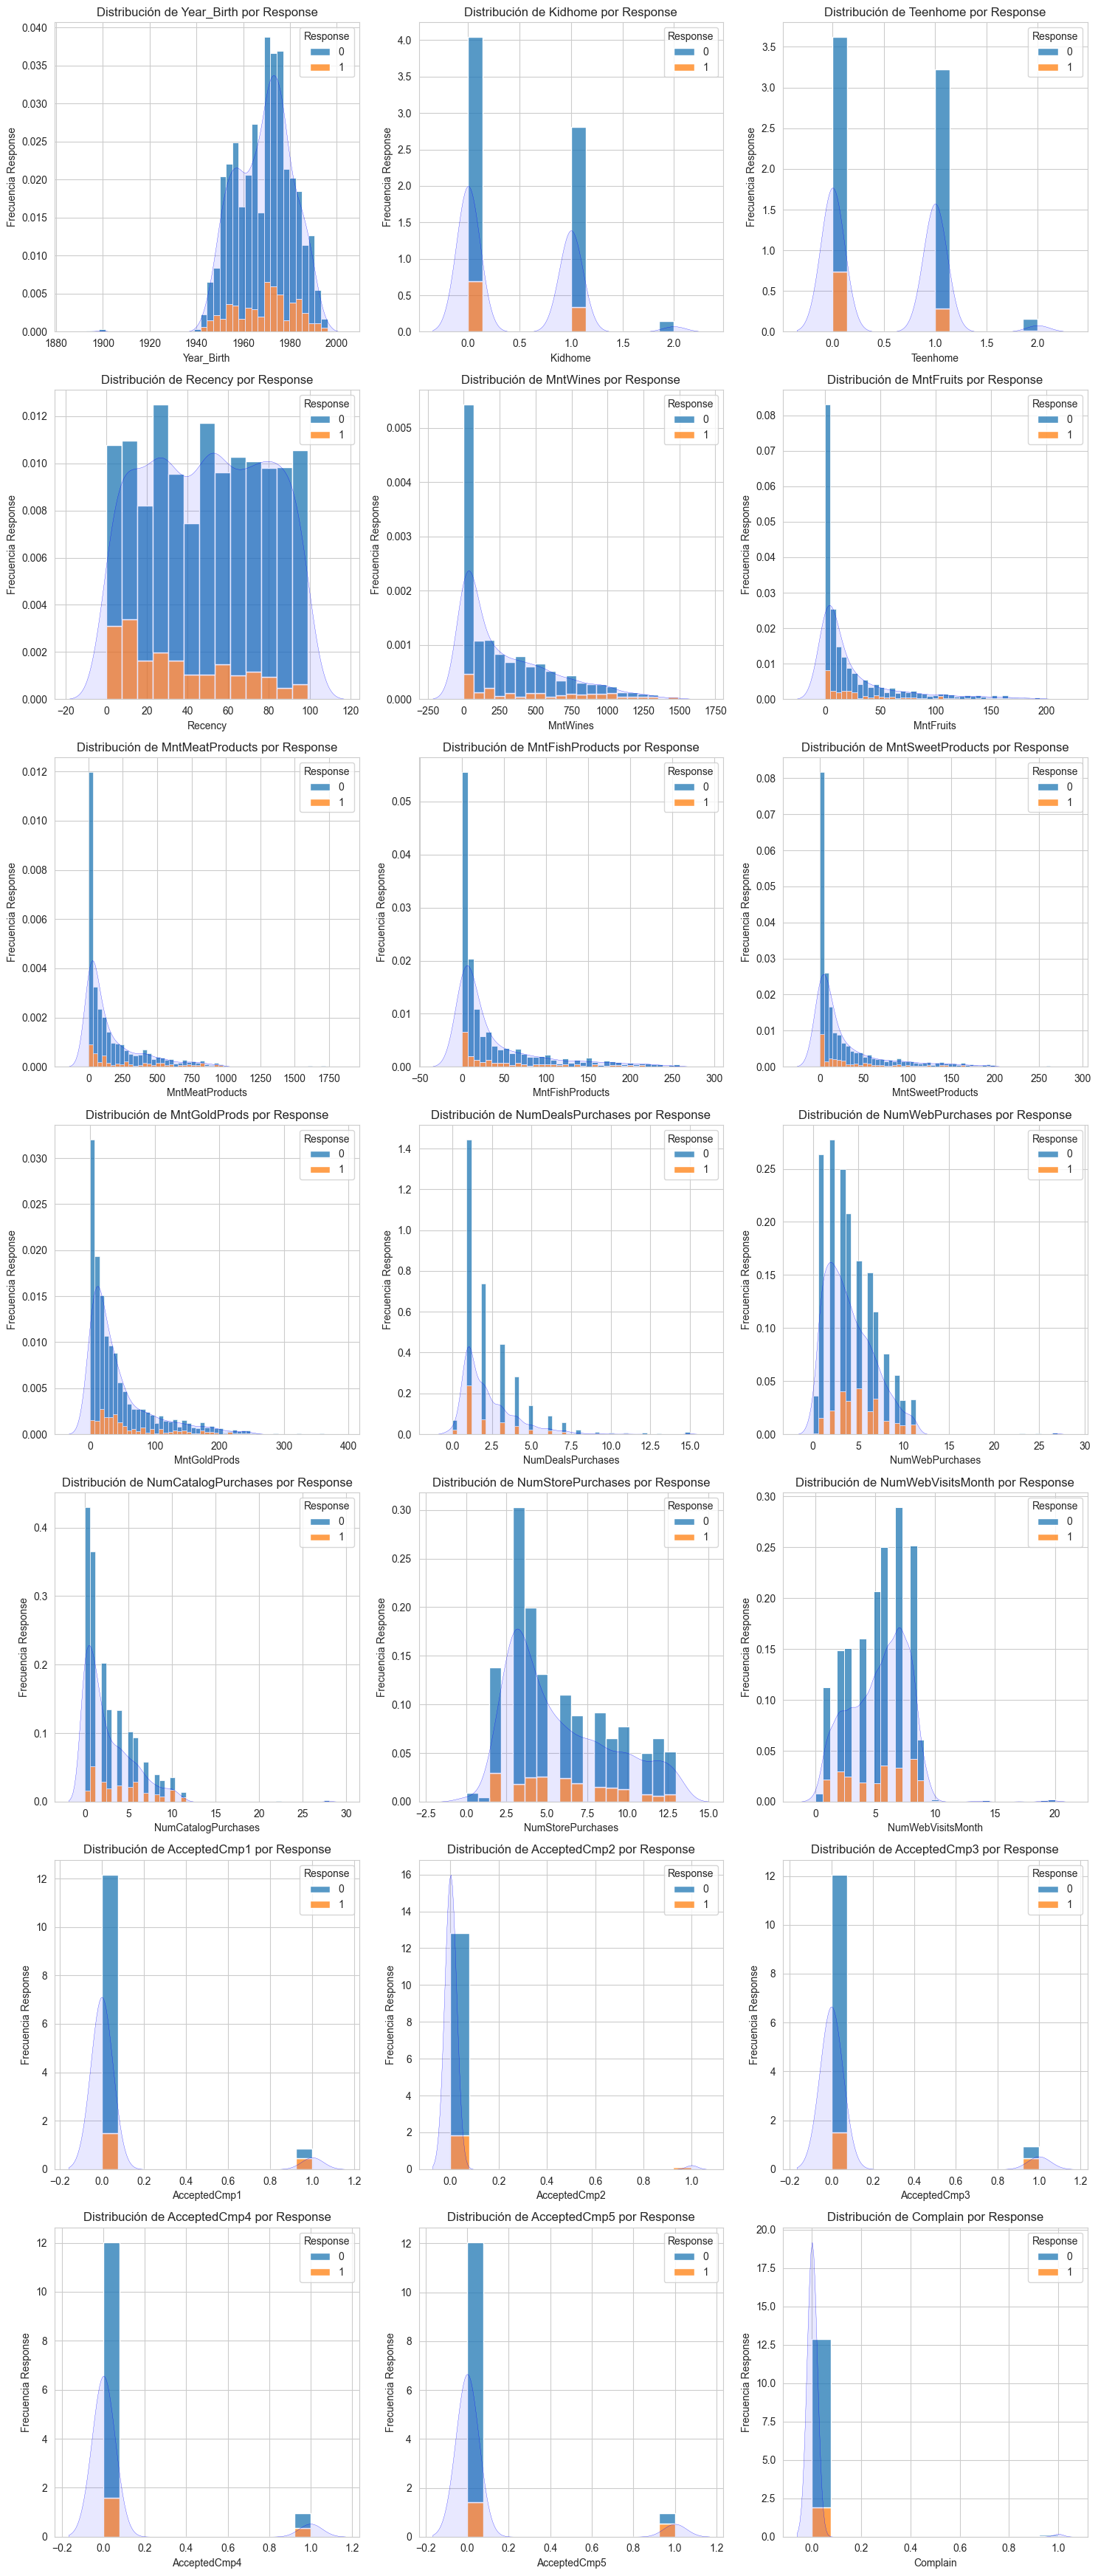

In [24]:
# Configurar la cuadrícula de histogramas
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Graficar distribuciones
for i, feature in enumerate(features):
    sns.histplot(data=data, x=feature, hue=response, multiple="stack", ax=axes[i], stat='density')
    sns.kdeplot(data=data, x=feature,  ax=axes[i], fill=True, color='blue', linewidth=0.2, alpha=0.09)
  #  axes[i].legend(feature, title="Density")
    axes[i].set_title(f'Distribución de {feature} por Response')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frecuencia Response')

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

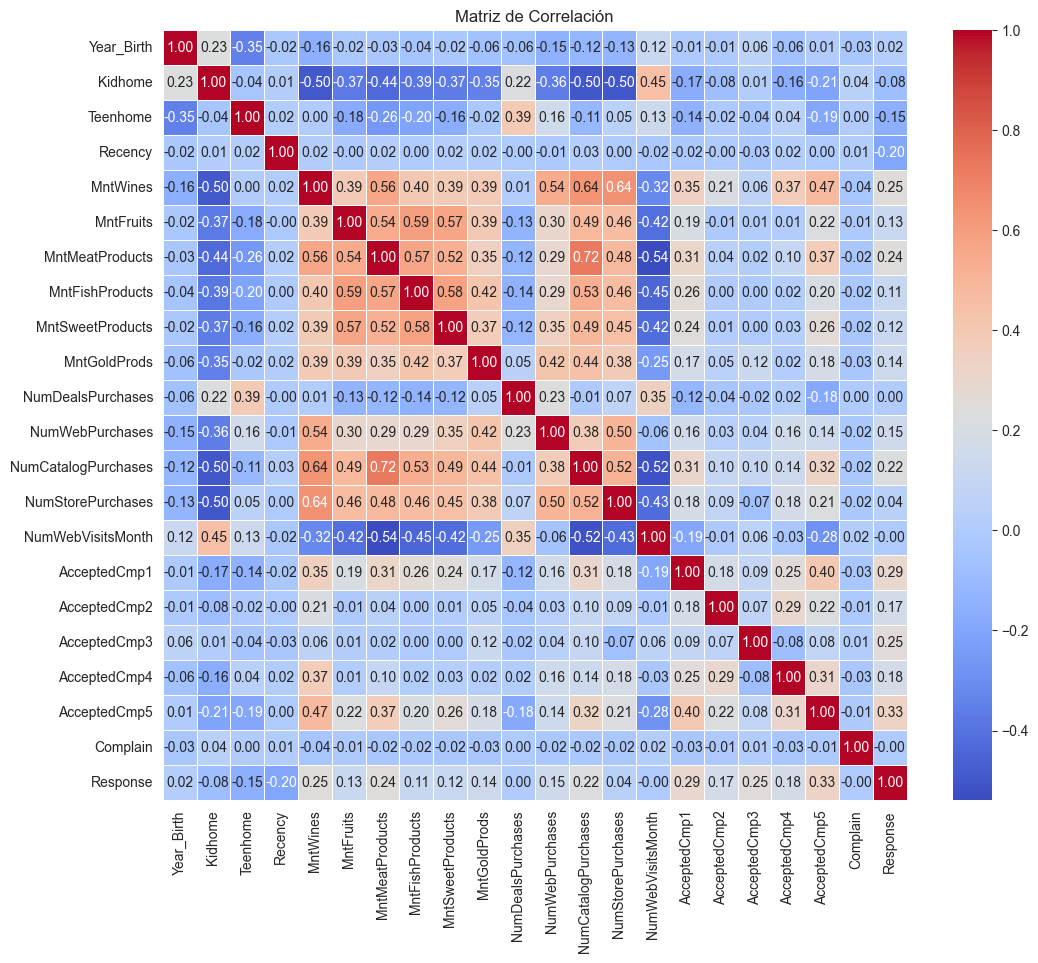

Correlación con Response:
Response               1.000000
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
AcceptedCmp3           0.254258
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
AcceptedCmp4           0.177019
AcceptedCmp2           0.169293
NumWebPurchases        0.148730
MntGoldProds           0.139850
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
NumStorePurchases      0.039363
Year_Birth             0.021325
NumDealsPurchases      0.002238
Complain              -0.001707
NumWebVisitsMonth     -0.003987
Kidhome               -0.080008
Teenhome              -0.154446
Recency               -0.198437
Name: Response, dtype: float64


In [15]:
# Calcular la matriz de correlación
correlation_matrix = data[features + [response]].corr()

# Graficar heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Correlación específica con Response
print("Correlación con Response:")
print(correlation_matrix[response].sort_values(ascending=False))


  # Corrección de valores atípicos: Detectar y tratar outliers

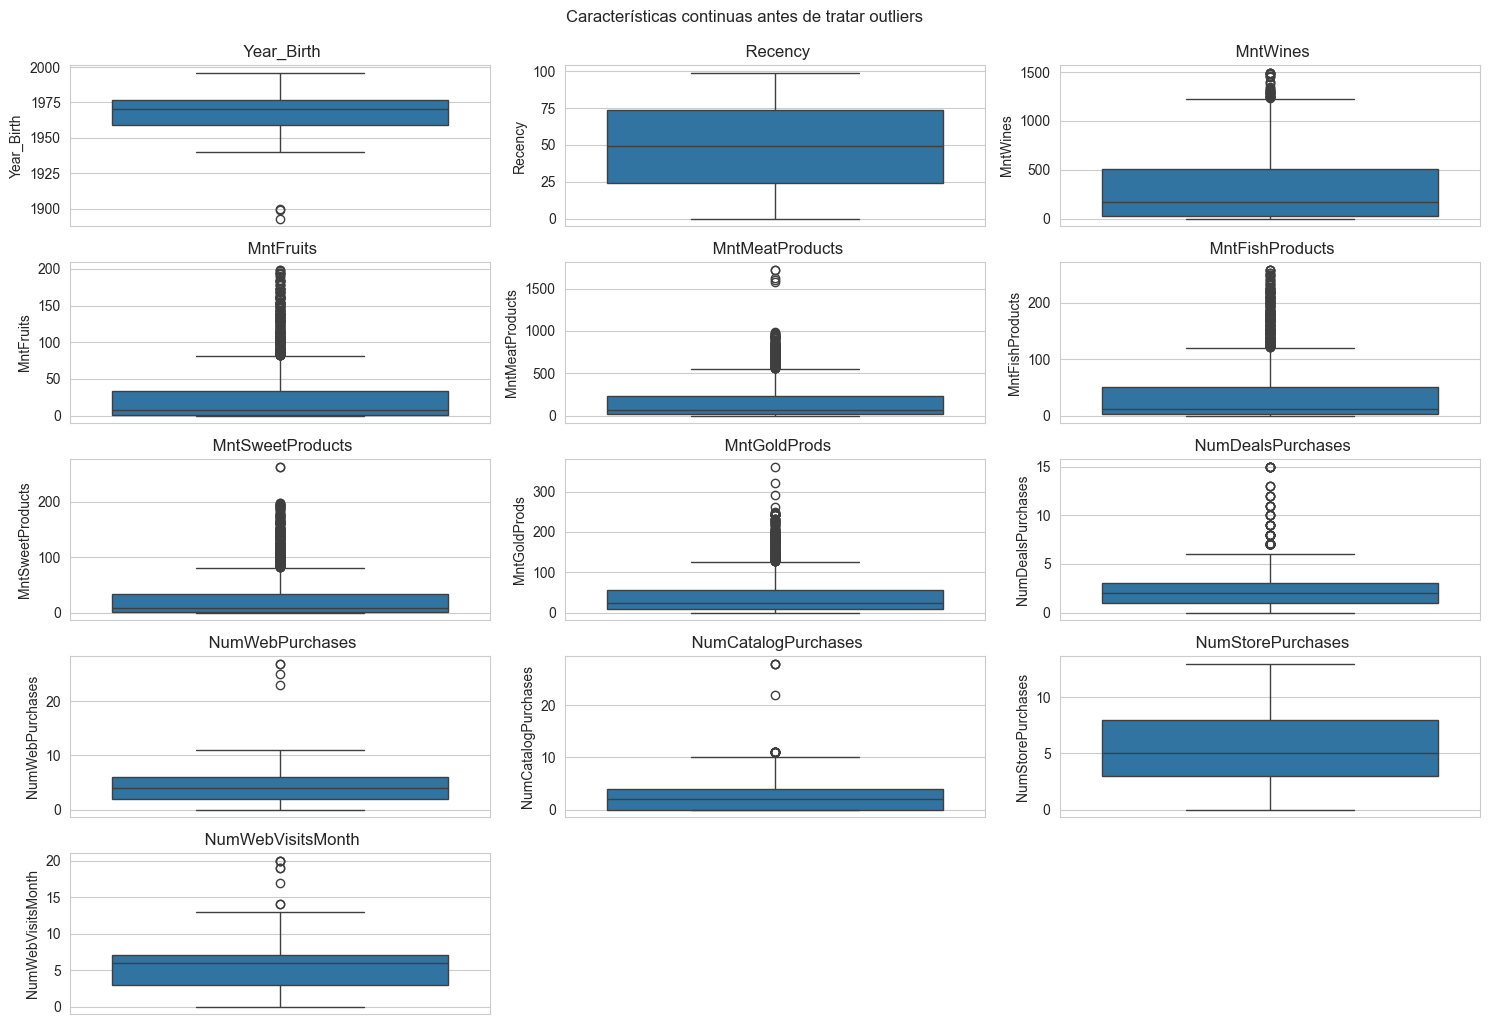

In [16]:
# Identificar columnas numéricas continuas para aplicar IQR
continuous_features = ['Year_Birth', 'Recency', 'MntWines', 'MntFruits',
                      'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                      'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                      'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Visualizar boxplots individuales para cada variable continua antes de tratar outliers
plt.figure(figsize=(15, 10))  # Tamaño de la figura
n_cols = 3  # Número de columnas en la cuadrícula
n_rows = (len(continuous_features) + n_cols - 1) // n_cols  # Calcular filas necesarias

for i, col in enumerate(continuous_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data[col])  # Boxplot para una sola columna
    plt.title(f' {col}')
    plt.ylabel(col)
    plt.tight_layout()

plt.suptitle('Características continuas antes de tratar outliers', y=1.02)
plt.show()

# Aplicacion de IQR

In [20]:
# Identificar columnas numéricas continuas para aplicar IQR
# Excluir variables binarias o categóricas
continuous_features = ['Year_Birth', 'Recency', 'MntWines', 'MntFruits',
                      'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                      'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                      'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

target = 'Response'

data = data.dropna(subset=[target])
X = data[features]
y = data[target]
if X[continuous_features].isna().any().any():
    print("Imputando valores nulos en columnas continuas...")
    X.loc[:, continuous_features] = X[continuous_features].fillna(X[continuous_features].mean())
else:
    print("No hay valores nulos en columnas continuas.")


# Función para eliminar outliers usando IQR
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filtrar filas donde la columna está dentro de los límites
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Aplicar IQR a las columnas continuas
data_clean = remove_outliers(data, continuous_features)

# Actualizar X e y después de la limpieza
X = data_clean[features].fillna(data_clean[features].mean())  # Imputar valores nulos restantes
y = data_clean[target]

# Verificar el impacto de la limpieza
print(f"Filas originales: {len(data)}")
print(f"Filas después de IQR: {len(data_clean)}")
print(f"Proporción de Response=1 antes: {data[target].mean():.4f}")
print(f"Proporción de Response=1 después: {data_clean[target].mean():.4f}")



No hay valores nulos en columnas continuas.
Filas originales: 2240
Filas después de IQR: 989
Proporción de Response=1 antes: 0.1491
Proporción de Response=1 después: 0.0900


# Resultado

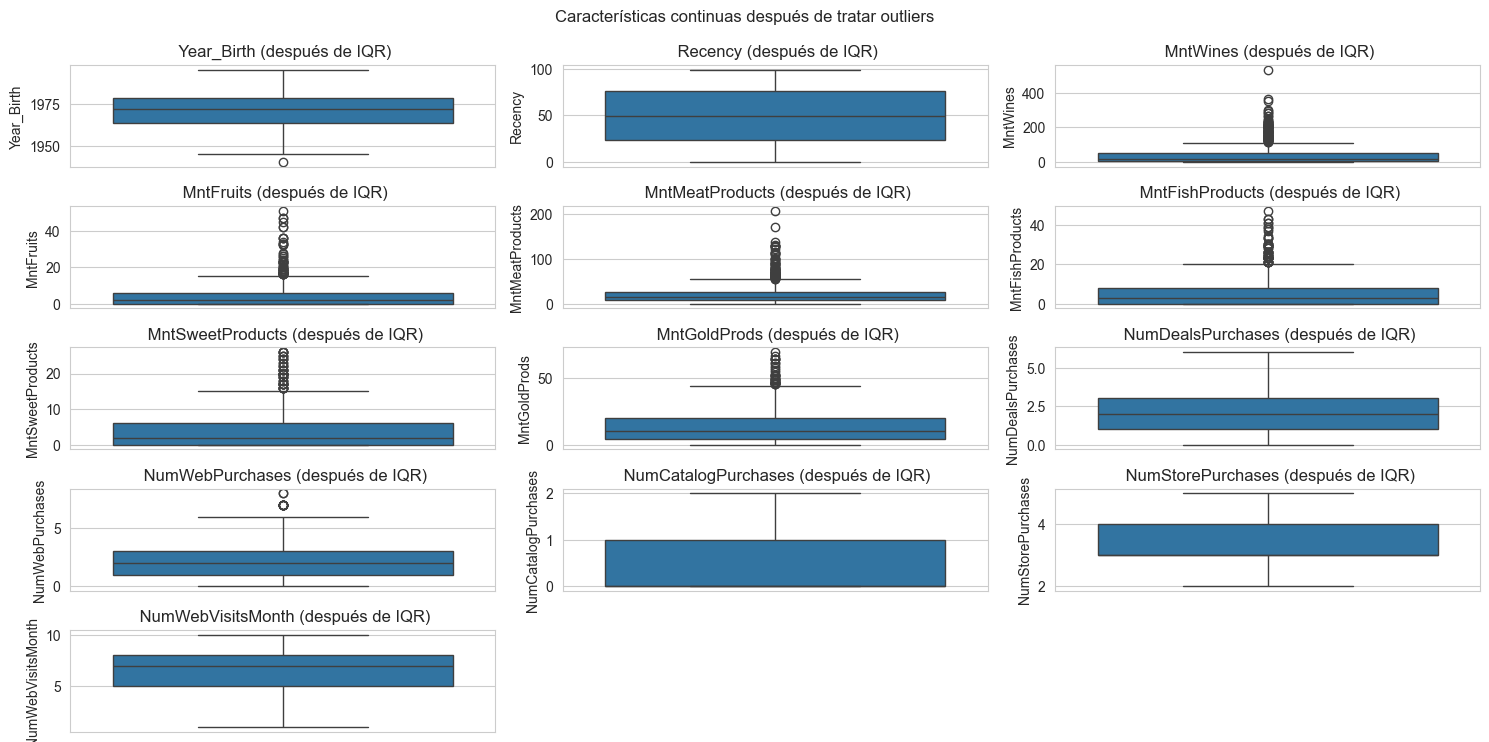

In [22]:
# Visualizar boxplots después de tratar outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data_clean[col])
    plt.title(f' {col} (después de IQR)')
    plt.ylabel(col)
    plt.tight_layout()

plt.suptitle('Características continuas después de tratar outliers', y=1.02)
plt.show()

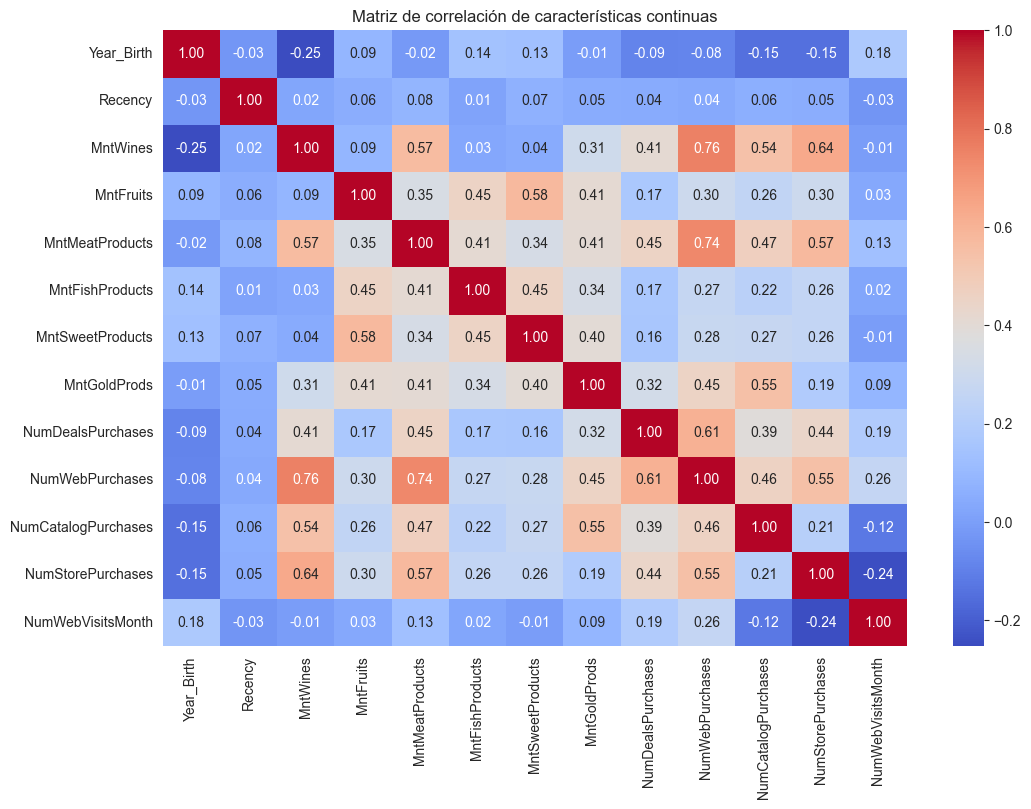

In [23]:
correlation_matrix = X[continuous_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación de características continuas')
plt.show()